# **Analysis on Data-Related Careers in Cebu**

In today's rapidly evolving job market, the demand for data-related skills is soaring, and Cebu is no exception. As industries digitize and prioritize data-driven decision-making, professionals with expertise in data analysis, data science, and related fields are becoming increasingly sought after.

To facilitate the exploration of job opportunities in the data domain within Cebu, we present an in-depth analysis project leveraging the [JIM Jobs Scraper](https://github.com/blurridge/JIM-jobs-scraper). This versatile tool is meticulously designed to streamline the job search process by extracting job listings from three prominent job search platforms: JobStreet, Indeed, and Mynimo.

Our project aims to provide valuable insights for job seekers, recruiters, and stakeholders interested in the data-related career landscape in Cebu. By aggregating and analyzing job listings across multiple platforms, we seek to uncover trends, skill requirements, salary ranges, and other pertinent information relevant to data-centric roles.

Through this analysis, we endeavor to empower individuals navigating their career paths in the data field, offering actionable intelligence to inform their job search strategies. Additionally, our findings can assist organizations in understanding the talent landscape and devising effective recruitment strategies tailored to the Cebu region.


# **Setup**

Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import re

# **Import datasets**
Each import will be showing its first 5 rows of data as a preview.

In [2]:
indeed_df = pd.read_csv("./data/scraped_indeed_jobs.csv")
indeed_df.head()

,job_id,job_name,company_name,job_location,job_link,query
0,6eea45b5f9454aa0,Data Analyst in BPO Set-up,XtendOps,Cebu City,https://ph.indeed.com/viewjob?jk=6eea45b5f9454aa0,data analyst
1,f7c96c8815d5de2a,[Non-Voice] Transaction Analyst,Interactech Solutions Inc.,Cebu City,https://ph.indeed.com/viewjob?jk=f7c96c8815d5de2a,data analyst
2,cfd79dab46aff093,Cebu Urgent Hiring!!! MIS Reporting analyst - ...,Staffwiz Global Outsourcing Inc.,Cebu City,https://ph.indeed.com/viewjob?jk=cfd79dab46aff093,data analyst
3,eaf396ced503b6c1,Data Analyst,Virtual Business Partners,Cebu,https://ph.indeed.com/viewjob?jk=eaf396ced503b6c1,data analyst
4,1457fc6e4e7dfbdf,Reporting Analyst,LanceSoft Inc,Mandaue,https://ph.indeed.com/viewjob?jk=1457fc6e4e7dfbdf,data analyst


In [3]:
mynimo_df = pd.read_csv("./data/scraped_mynimo_jobs.csv")
mynimo_df.head()

,job_id,job_name,company_name,job_location,job_link,query
0,442840,Data Scientist,Helpmate Incorporated,"Cebu City, Cebu",https://www.mynimo.com/jobs/view/442840,data analyst
1,442650,Customer Success Advocate,CTC BPO Inc. (FKA: CallTek Center Internationa...,"Cebu City, Cebu",https://www.mynimo.com/jobs/view/442650,data analyst
2,443674,Data Analyst,Cebu Home and Builders Centre,"Mandaue City, Cebu",https://www.mynimo.com/jobs/view/443674,data analyst
3,445679,Data Analyst,Channel Precision Inc.,"Cebu City, Cebu",https://www.mynimo.com/jobs/view/445679,data analyst
4,445136,Work from Home! Experienced Data Analyst,VOsquared LLC,Home-based,https://www.mynimo.com/jobs/view/445136,data analyst


In [4]:
jobstreet_df = pd.read_csv("./data/scraped_jobstreet_jobs.csv")
jobstreet_df.head()

,job_id,job_name,company_name,job_location,job_link,query
0,74474543,Data and Reports Analyst,Dynata Philippines Inc.,Lapu-Lapu City,https://www.jobstreet.com.ph/job/74474543,data analyst
1,74473368,Data Processor,Dynata Philippines Inc.,Lapu-Lapu City,https://www.jobstreet.com.ph/job/74473368,data analyst
2,74433623,Financial Profitability Analyst - Cebu,"SEAOIL Philippines, Inc.",Cebu City,https://www.jobstreet.com.ph/job/74433623,data analyst
3,74210016,Business Analyst,NORTH TREND MARKETING CORPORATION,Cebu City,https://www.jobstreet.com.ph/job/74210016,data analyst
4,74378582,APPLICATION SUPPORT ANALYST (Corporate/Cebu-Ba...,"Metro Retail Stores Group, Inc.",Guizo,https://www.jobstreet.com.ph/job/74378582,data analyst


In [5]:
jobs_df = pd.concat([indeed_df, mynimo_df, jobstreet_df])
jobs_df

,job_id,job_name,company_name,job_location,job_link,query
0,6eea45b5f9454aa0,Data Analyst in BPO Set-up,XtendOps,Cebu City,https://ph.indeed.com/viewjob?jk=6eea45b5f9454aa0,data analyst
1,f7c96c8815d5de2a,[Non-Voice] Transaction Analyst,Interactech Solutions Inc.,Cebu City,https://ph.indeed.com/viewjob?jk=f7c96c8815d5de2a,data analyst
2,cfd79dab46aff093,Cebu Urgent Hiring!!! MIS Reporting analyst - ...,Staffwiz Global Outsourcing Inc.,Cebu City,https://ph.indeed.com/viewjob?jk=cfd79dab46aff093,data analyst
3,eaf396ced503b6c1,Data Analyst,Virtual Business Partners,Cebu,https://ph.indeed.com/viewjob?jk=eaf396ced503b6c1,data analyst
4,1457fc6e4e7dfbdf,Reporting Analyst,LanceSoft Inc,Mandaue,https://ph.indeed.com/viewjob?jk=1457fc6e4e7dfbdf,data analyst
...,...,...,...,...,...,...
178,74069586,Recruitment Specialist (AI-Driven Talent Acqui...,"Captain BPO, Inc.",Cebu City,https://www.jobstreet.com.ph/job/74069586,AI Consultant
179,74373610,Trainer,ResultsCX,Lapu-Lapu City,https://www.jobstreet.com.ph/job/74373610,AI Consultant
180,74373532,Training Intern,ResultsCX,Lapu-Lapu City,https://www.jobstreet.com.ph/job/74373532,AI Consultant
181,72186566,Digital Consulting Partner - Business Process ...,Wipro Philippines Inc.,Cebu City,https://www.jobstreet.com.ph/job/72186566,AI Consultant


# **Data Preprocessing**
Since most of the scraped data are raw, the results stored in the .csv's are based off the job site's search results. We will be filtering jobs not within the scope of: 

- Data Scientist
- Data Engineer
- AI Engineer
- ML Engineer
- ML Operations
- Data Analyst
- ML Researcher
- ML Developer
- AI Developer
- ML Consultant
- AI Consultant

In [6]:
# Function to check if any keyword from a category appears in the job description

def filter_jobs(description):
    # Define the keywords for each category
    categories = {
        'Data Scientist': ['data scientist'],
        'Data Engineer': ['data engineer'],
        'AI Engineer': ['ai engineer', 'artificial intelligence engineer'],
        'ML Engineer': ['ml engineer', 'machine learning engineer'],
        'ML Operations': ['machine learning operations', 'ml operations'],
        'Data Analyst': ['data analyst', 'business analyst', 'data and reports analyst'],
        'ML Researcher': ['machine learning researcher', 'ml researcher'],
        'ML Developer': ['machine learning developer', 'ml developer'],
        'AI Developer': ['ai developer', 'artificial intelligence developer'],
        'ML Consultant': ['machine learning consultant', 'ml consultant'],
        'AI Consultant': ['ai consultant', 'artificial intelligence consultant'],
    }
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in description.lower():
                return category
    return None

# Apply the filter function to the 'job_name' column
jobs_df['job_category'] = jobs_df['job_name'].apply(filter_jobs)
filtered_jobs_df = jobs_df.dropna(subset=['job_category'])
print(filtered_jobs_df.to_string())

               job_id                                                                              job_name                                   company_name         job_location                                           job_link                        query    job_category
0    6eea45b5f9454aa0                                                            Data Analyst in BPO Set-up                                       XtendOps            Cebu City  https://ph.indeed.com/viewjob?jk=6eea45b5f9454aa0                 data analyst    Data Analyst
3    eaf396ced503b6c1                                                                          Data Analyst                      Virtual Business Partners                 Cebu  https://ph.indeed.com/viewjob?jk=eaf396ced503b6c1                 data analyst    Data Analyst
7    75623bedc5e3765e                                                       Data Analyst | Business Analyst                                 Rural Net Inc.            Cebu City  https:/

In [7]:
# View dropped rows for verification

dropped_rows = jobs_df[~jobs_df.index.isin(filtered_jobs_df.index)]
print(dropped_rows.to_string())

               job_id                                                                        job_name                                                     company_name                job_location                                           job_link                        query job_category
1    f7c96c8815d5de2a                                                 [Non-Voice] Transaction Analyst                                       Interactech Solutions Inc.                   Cebu City  https://ph.indeed.com/viewjob?jk=f7c96c8815d5de2a                 data analyst         None
10   c2f930d281e9a4e1                                              MIS Reporting Analyst - START ASAP                                                    Staffwiz Inc.                   Cebu City  https://ph.indeed.com/viewjob?jk=c2f930d281e9a4e1                 data analyst         None
11   c7285beb045e5dc4                           Cebu Urgent Hiring!!! MIS Reporting Analyst 60k - 80k                                   

# **Data Analysis**

## 1. How many job listings are there per company?

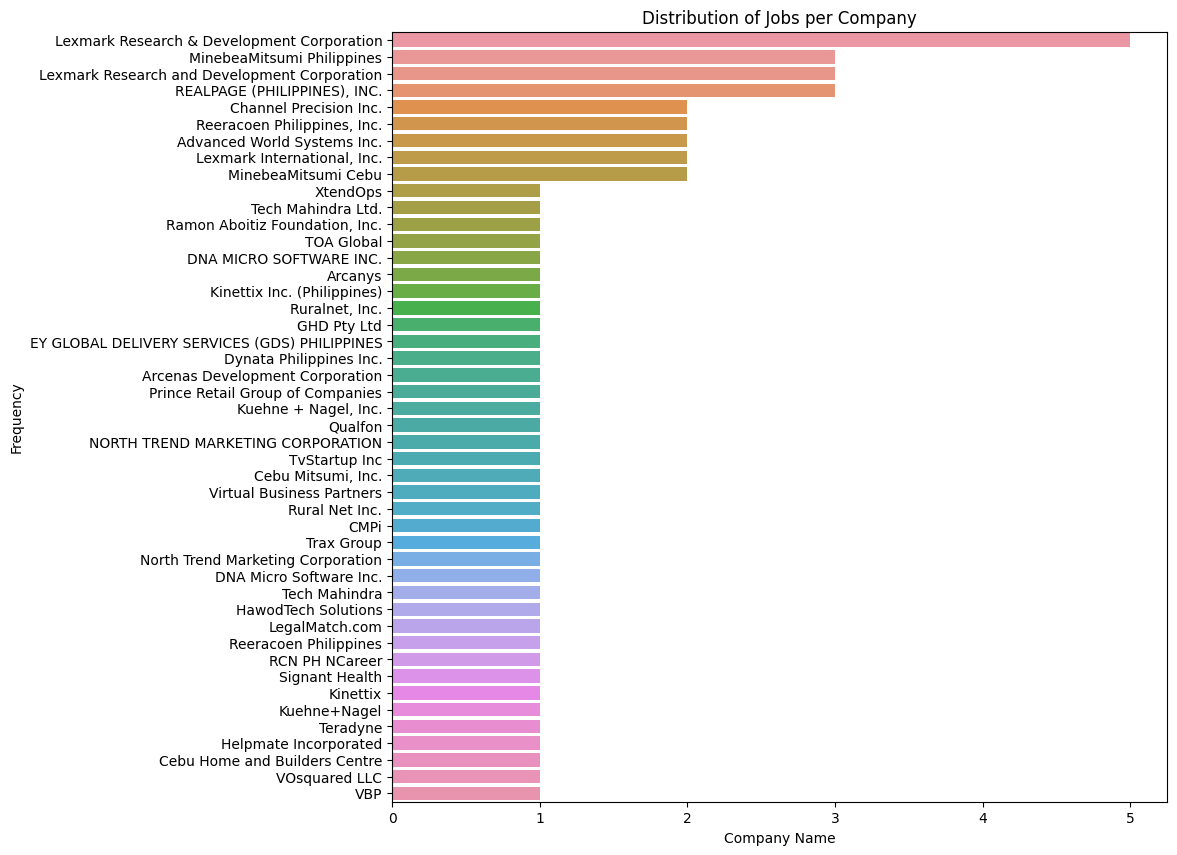

In [8]:
# Get unique values and their counts
value_counts = filtered_jobs_df['company_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='horizontal')
plt.title('Distribution of Jobs per Company')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.show()

## 2. How many jobs per category?

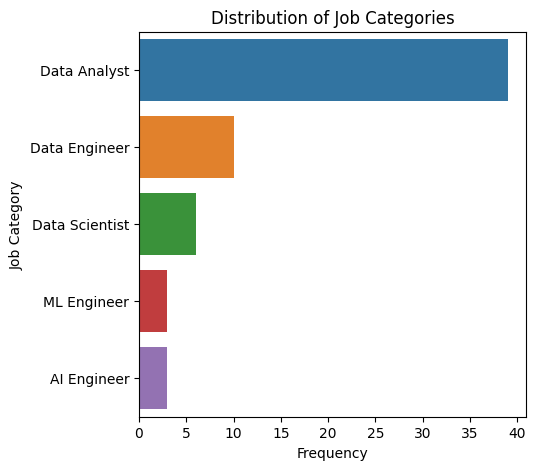

In [9]:
# Get unique values and their counts
value_counts = filtered_jobs_df['job_category'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='horizontal')
plt.title('Distribution of Job Categories')
plt.xlabel('Frequency')
plt.ylabel('Job Category')
plt.show()